In [53]:
### import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

'''
#YEAR TO PROCESS
yeart='2005'
montht='01'

def depth_bin_count(yeart,montht):
    print '...'
    ROOT = '/home1/ballycotton/DATA/PIRATE/COLOC_EN4/'+yeart+'/'
    path = glob.glob(os.path.join(ROOT+'*'+montht+'.nc'))
    #OPEN
    OCC=xr.open_mfdataset(path,concat_dim='N_OBS',decode_times=False,mask_and_scale=True)
    #MATCH FILTER
    OCC=OCC.where((OCC.MATCH_EN4==1),drop=True)
    #DROP SOME USELESS VARIABLES FOR INTERPOLATION
    OCC=OCC.drop(['JULD','MATCH_EN4','LATITUDE_EN4','LONGITUDE_EN4',
                  'PSAL_EN4','DEPTH_EN4','POTM_EN4','POTM_EN4_QC',
                  'PSAL_EN4_QC','TEMP_EN4','POTM_Hx','PSAL_Hx'])

    OCC=OCC.rename({'JULD_EN4': 'JULD'})
    OCC=OCC.squeeze()

    #QC FILTER
    mask=((~np.isnan(np.abs(OCC.POTM_OBS))) & (~np.isnan(np.abs(OCC.PSAL_OBS))) & \
         (OCC.PSAL_QC == 1.) & (OCC.POTM_QC == 1.) )
    OCC=OCC.where((mask.transpose()),drop=True)

    # ALIGN VARIABLES ALONG ONE DIMENSION 
    OCC['A']=OCC.JULD.min(dim='N_LEVELS')
    OCC['B']=OCC.STATION_IDENTIFIER.min(dim='N_LEVELS')
    OCC['C']=OCC.LATITUDE.min(dim='N_LEVELS')
    OCC['D']=OCC.LONGITUDE.min(dim='N_LEVELS')
    OCC=OCC.drop(['JULD','STATION_IDENTIFIER','LATITUDE','LONGITUDE'])
    OCC=OCC.rename({'A':'JULD','B':'STATION_IDENTIFIER','C':'LATITUDE','D':'LONGITUDE'})   
    #KEEP PROFILES WITH AT LEAST 10 VALUES OVER A 1000M LAYER
    OCC['N']=OCC['POTM_OBS'].notnull().sum('N_LEVELS')
    H1=OCC['DEPTH'].where(OCC['POTM_OBS'].notnull()).max(dim='N_LEVELS')
    H2=OCC['DEPTH'].where(OCC['POTM_OBS'].notnull()).min(dim='N_LEVELS')
    OCC['H']=H1-H2
    OCC['KEEP'] = xr.DataArray(np.all((OCC['H'] >= 1000, OCC['N'] >= 10), axis=0),dims= {'N_OBS':OCC['N_OBS']})
    OCC = OCC.where(OCC['KEEP'], drop=True)
    OCC = OCC.drop(['N', 'H', 'KEEP'])    
    cous=np.array([])
    binlvl=range(0,2100,100)
    for i in range(len(binlvl)-1):
        OCC0=OCC.where((OCC['DEPTH']>binlvl[i]) & (OCC['DEPTH']< binlvl[i+1]),drop=True)
        cous=np.append(cous,len(OCC0.N_OBS))  
        #print binlvl[i],'-',binlvl[i+1],'=',len(OCC0.N_OBS)
    print yeart,montht,':',cous    
    return cous   
    
years=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
months=['01','02','03','04','05','06','07','08','09','10','11','12']

aa=np.empty([0,20])
for i in range(len(years)):
    for j in range(len(months)):
        yeart=years[i]
        montht=months[j]
        aa=np.vstack((aa,depth_bin_count(yeart,montht)))   
        
np.savetxt("depth_bin_count.csv", aa, delimiter=",")        
'''

DBC=pd.read_csv('depth_bin_count.csv',sep=',',skiprows=0,index_col=False)

In [133]:
DBC

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
0,155.0,152.0,152.0,154.0,152.0,151.0,153.0,155.0,155.0,155.0,154.0,143.0,143.0,143.0,140.0,134.0,124.0,114.0,109.0,112.0
1,137.0,136.0,136.0,136.0,135.0,136.0,136.0,136.0,137.0,137.0,136.0,124.0,122.0,122.0,124.0,117.0,101.0,88.0,85.0,84.0
2,153.0,153.0,153.0,153.0,153.0,152.0,153.0,153.0,153.0,153.0,152.0,140.0,139.0,139.0,139.0,130.0,112.0,96.0,92.0,92.0
3,144.0,144.0,144.0,143.0,142.0,142.0,144.0,144.0,143.0,144.0,144.0,130.0,129.0,129.0,129.0,121.0,108.0,89.0,83.0,83.0
4,130.0,130.0,127.0,125.0,129.0,129.0,128.0,129.0,129.0,130.0,129.0,118.0,117.0,117.0,118.0,110.0,98.0,83.0,79.0,78.0
5,137.0,139.0,139.0,139.0,137.0,137.0,137.0,136.0,139.0,139.0,139.0,123.0,123.0,123.0,123.0,114.0,104.0,92.0,88.0,88.0
6,124.0,124.0,123.0,124.0,123.0,123.0,123.0,122.0,123.0,123.0,122.0,111.0,111.0,111.0,111.0,98.0,88.0,78.0,75.0,75.0
7,126.0,126.0,126.0,126.0,126.0,126.0,126.0,125.0,126.0,126.0,126.0,118.0,117.0,117.0,117.0,108.0,93.0,81.0,77.0,77.0
8,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,109.0,103.0,103.0,103.0,97.0,83.0,71.0,66.0,65.0
9,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,93.0,88.0,88.0,88.0,81.0,73.0,62.0,59.0,59.0


In [42]:
from dateutil.relativedelta import *
base = datetime.datetime(2005, 1, 15)
arrx = np.array([base + relativedelta(months=+i) for i in xrange(132)])

<IPython.core.display.Javascript object>


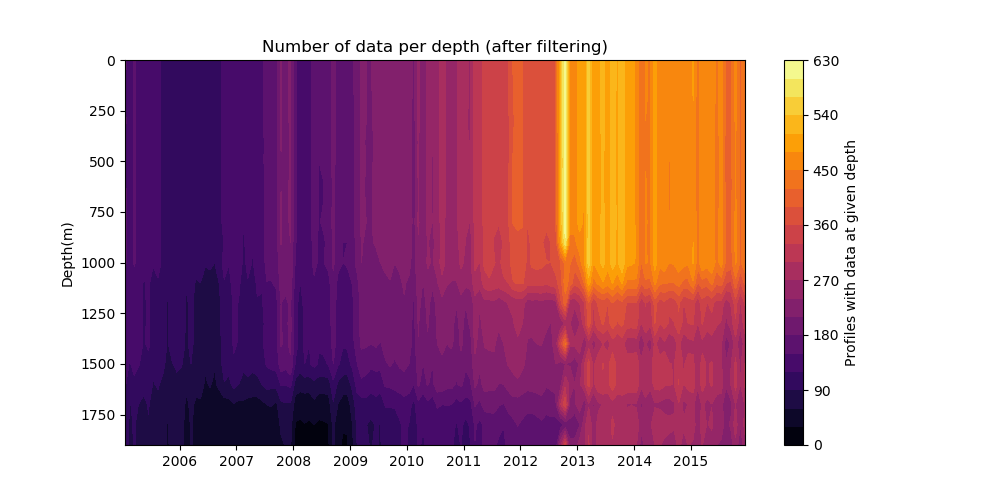

<IPython.core.display.Javascript object>


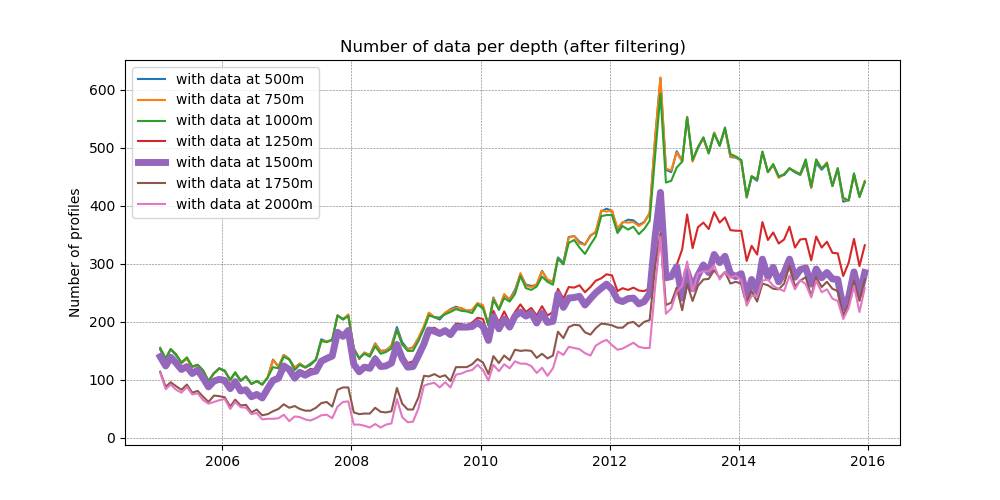

In [134]:
#%matplotlib notebook
plt.figure(figsize=(10, 5))
plt.ylim(1900,0)
plt.ylabel('Depth(m)')
plt.title('Number of data per depth (after filtering)')
plt.contourf(arrx,range(0,2000,100),np.transpose(DBC),20,cmap='inferno')
cbar=plt.colorbar()
cbar.set_label('Profiles with data at given depth')

plt.figure(figsize=(10, 5))
plt.grid(color='k', linestyle=':', linewidth=0.4)
plt.ylabel('Number of profiles')
plt.title('Number of data per depth (after filtering)')

labels=['with data at 500m', 'with data at 750m', 'with data at 1000m', 'with data at 1250m',
        'with data at 1500m', 'with data at 1750m', 'with data at 2000m']
plt.plot(arrx,DBC.v5)
plt.plot(arrx,DBC.v8)
plt.plot(arrx,DBC.v10)
plt.plot(arrx,DBC.v13)
plt.plot(arrx,DBC.v15,linewidth=5)
plt.plot(arrx,DBC.v18)
plt.plot(arrx,DBC.v20)

plt.legend(labels,loc='upper left')
   
plt.show()    